## Significance of the "Largest Surplus on Record in American History"
On May 25, 2018, Judy Woodruff interviewed Marc Short, White House Director Of Legislative Affairs, on the PBS Newshour.  The video and transcript can be found at [this link](https://www.pbs.org/newshour/show/white-house-separation-of-migrant-families-at-border-is-product-of-bad-laws).  At 2:43 in the video, Marc Short states the following:

> And, lastly, in April, we had the largest surplus on record in American history. That is a result of the growth and the revenues coming into the federal government because of the tax plan.

A [Washington Times article](https://www.washingtontimes.com/news/2018/may/7/cbo-says-april-was-best-month-history-us-budget/) similarly reported the record surplus.  It starts:

> The federal government took in a record tax haul in April en route to its biggest-ever monthly budget surplus, the Congressional Budget Office said, as a surging economy left Americans with more money in their paychecks — and this more to pay to Uncle Sam.

> All told the government collected \$515 billion and spent \$297 billion, for a total monthly surplus of \$218 billion. That swamped the previous monthly record of \$190 billion, set in 2001.

However, the article went on to give more perspective than Marc Short, stating: 

> April is always a strong month for government finances, with taxpayers filing their returns for the previous year and settling up what they owe, even as expenditures often dip for the month.

> But this year was particularly strong, with receipts jumping 13 percent compared to a year ago.

Following is Python code which reads the Monthly Treasury Statements for the [current issue](https://www.fiscal.treasury.gov/fsreports/rpt/mthTreasStmt/current.htm) and [previous issues](https://www.fiscal.treasury.gov/fsreports/rpt/mthTreasStmt/backissues.htm) and plots the monthly receipts, oulays, and surplus/deficit starting in October of 2014.


            Total Receipts  Total Outlays  Surplus/Deficit
2014-10-01         212.719        334.432         -121.713
2014-11-01         191.436        248.254          -56.818
2014-12-01         335.327        333.463            1.864
2015-01-01         306.742        324.289          -17.546
2015-02-01         139.388        331.738         -192.350
2015-03-01         234.187        287.105          -52.918
2015-04-01         471.801        315.092          156.709
2015-05-01         212.386        296.454          -84.068
2015-06-01         342.933        292.447           50.487
2015-07-01         225.493        374.680         -149.187
2015-08-01         210.837        275.257          -64.420
2015-09-01         365.473        274.412           91.061
2015-10-01         211.046        347.604         -136.558
2015-11-01         204.968        269.517          -64.549
2015-12-01         349.631        364.075          -14.444
2016-01-01         313.579        258.416           55.1

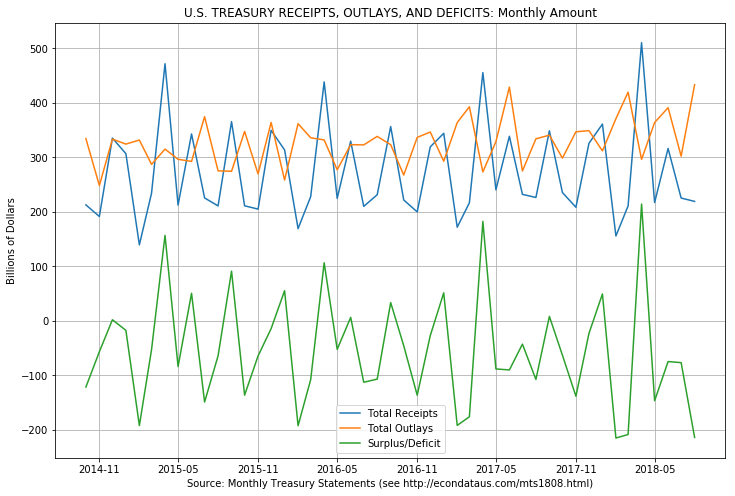

In [56]:
# Monthly Treasury Statement (MTS) - Current Issue:
# https://www.fiscal.treasury.gov/fsreports/rpt/mthTreasStmt/current.htm
# Monthly Treasury Statement (MTS) - Previous Issues:
# https://www.fiscal.treasury.gov/fsreports/rpt/mthTreasStmt/backissues.htm

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
pd.set_option('display.width', 120)
#pd.set_option('max_rows', 200)

xlsx_files_yr = [
    'https://www.fiscal.treasury.gov/fsreports/rpt/mthTreasStmt/mts0915.xls',
    'https://www.fiscal.treasury.gov/fsreports/rpt/mthTreasStmt/mts0916.xls',
    'https://www.fiscal.treasury.gov/fsreports/rpt/mthTreasStmt/mts0917.xls',
    'https://www.fiscal.treasury.gov/fsreports/rpt/mthTreasStmt/mts0818.xls' # UPDATE xls filename
]
def joinyear(year):
    iyr = year - 2015
    xx = pd.read_excel(xlsx_files_yr[iyr], sheet_name='Table 7', index_col=0, skiprows=4)
    if year < 2018:
        xx = xx.iloc[[0,1,3,4,5,6,7,8,9,10,99,102], 0:12]
    else:
        xx = xx.iloc[[0,1,3,4,5,6,7,8,9,10,98,101], 0:12]
    years = [year-1,year-1,year-1,year,year,year,year,year,year,year,year,year]
    months = ['10','11','12','01','02','03','04','05','06','07','08','09']
    #months = [10,11,12,1,2,3,4,5,6,7,8,9]
    for i in range(0,12):
        years[i] = str(years[i])+"-"+months[i]+"-01"
    xx.columns = pd.to_datetime(years)
    xx.index = ['Individual','Corporation','Employment','Unemployment','Other Retirement',
                'Excise','Estate','Customs','Miscellaneous','Total Receipts','Total Outlays','Surplus/Deficit']
    if year >= 2018:
        xx = xx.iloc[:, 0:11] # UPDATE last index
    #print(xx)
    return(xx)

def joinyears(start_year, end_year):
    yy = joinyear(2015)
    for year in range(start_year+1, end_year+1):
        yy = yy.join(joinyear(year))
    return(yy.T)

def dofilter(ff, numeric=True, rollingsum=False, normalize=False, divisor=1000):
    #print(yy)
    #print(yy.T)
    first = 0
    for i in range(0,len(ff.columns)):
        if (numeric):
            ff.iloc[:,i] = ff.iloc[:,i].str.replace(',','').astype(int)
        if (rollingsum):
            ff.iloc[:,i] = ff.iloc[:,i].rolling(window=12).sum()
            first = 11
        if (normalize):
            ff.iloc[:,i] = ff.iloc[:,i] - ff.iloc[first,i]
        ff.iloc[:,i] = ff.iloc[:,i]/divisor
    #yy = yy.T
    #yy = yy.iloc[:,9:]
    return(ff)

yy0 = joinyears(2015, 2018)

yy = yy0.copy()
zz = dofilter(yy)
dd = zz.iloc[:,9:]
print(dd)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(dd)
ax.set_title('U.S. TREASURY RECEIPTS, OUTLAYS, AND DEFICITS: Monthly Amount')
ax.set_xlabel('Source: Monthly Treasury Statements (see http://econdataus.com/mts1808.html)') # UPDATE xlabel
ax.set_ylabel('Billions of Dollars')
ax.grid(zorder=0)
ax.legend(dd.columns)


The reason for starting in October of 2014 is that this date is the start of fiscal year 2015, the first year for which the Treasury has spreadsheets posted on its site.  In any event, the above plot clearly shows that receipts and surpluses peak in April of every year, presumedly due to taxpayers filing their returns.  The plot also shows that the prior two months appeared to have had the largest monthly deficits since at least October of 2014.  In fact, a [ZeroHedge article](https://www.zerohedge.com/news/2018-05-10/us-posts-biggest-budget-surplus-history) mentions that the "March budget deficit of \$208.7 billion was 18% higher than \$176.2BN deficit recorded last March, and was the biggest March budget deficit in US history."

In order to factor in the periodic surpluses and deficits that occur over each year, it makes sense to look at the 12-month rolling sum of these values.  That is done in the following Python code and the resulting plot.


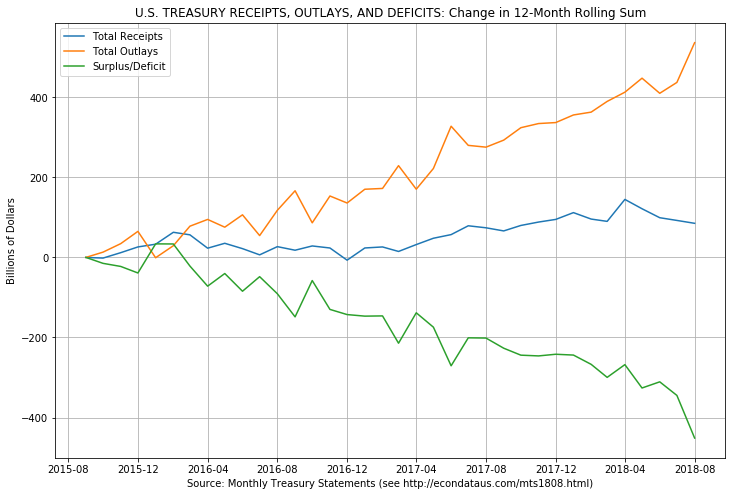

In [57]:
yy = yy0.copy()
zz = dofilter(yy, rollingsum=True, normalize=True)
dd = zz.iloc[:,9:]
#print(dd)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(dd)
ax.set_title('U.S. TREASURY RECEIPTS, OUTLAYS, AND DEFICITS: Change in 12-Month Rolling Sum')
ax.set_xlabel('Source: Monthly Treasury Statements (see http://econdataus.com/mts1808.html)') # UPDATE
ax.set_ylabel('Billions of Dollars')
ax.grid(zorder=0)
ax.legend(dd.columns)


As can be seen, the 12-month rolling sum of receipts has increased by a bit over \$100 billion since Trump took office.  However, yearly outlays have increased by over \$200 billion, causing the yearly deficit to increase by over \$100 billion.

Focusing on the receipts, the following Python code plots the 12-month rolling sum of the three largest contributors to receipts.  Those are individual income taxes, corporation income taxes, and employment taxes.  Employment taxes consist chiefly of payroll taxes.


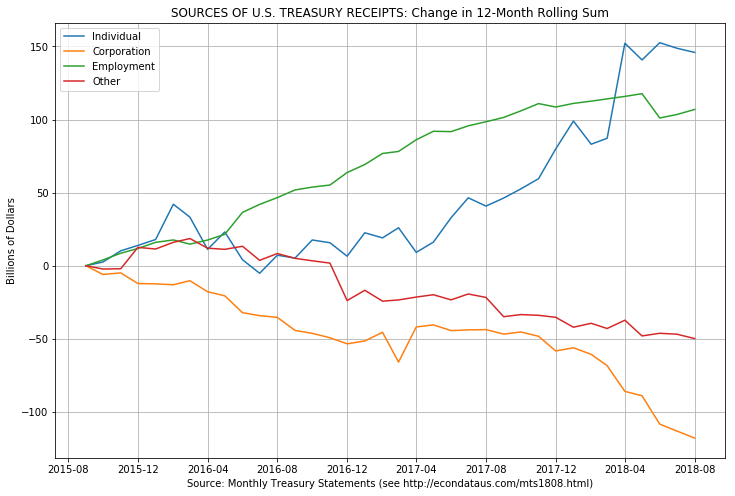

In [58]:
yy = yy0.copy()
zz = dofilter(yy, rollingsum=True, normalize=True)
dd = zz.iloc[:,0:3]
oo = zz.iloc[:,3:9]
dd.is_copy = False # avoids warning
dd['Other'] = oo.sum(axis=1, skipna=False)
#print(dd)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(dd)
ax.set_title('SOURCES OF U.S. TREASURY RECEIPTS: Change in 12-Month Rolling Sum')
ax.set_xlabel('Source: Monthly Treasury Statements (see http://econdataus.com/mts1808.html)') # UPDATE
ax.set_ylabel('Billions of Dollars')
ax.grid(zorder=0)
ax.legend(dd.columns)
fig.savefig("mts1808rec12m.png") # UPDATE filename


As can be seen, yearly individual income tax receipts have risen about \$125 billion under Trump.  Yearly employment tax receipts have risen about \$50 billion and yearly corporation tax receipts have dropped about \$40 billion.  It is interesting to note that most of the drop in corporation tax receipts have occurred since the passage of the Tax Cuts and Jobs Act of 2017 so that may be the most visible effect of the tax bill on receipts.  The surge in individual tax receipts likely has little to do with the tax bill since the taxes paid in April are based on the prior tax law.  Regarding individual tax receipts, the Washington Times article does say the following:

> Analysts said they’ll have a better idea of what’s behind the surge as more information rolls in, but for now said it looks like individual taxpayers are paying more because they have higher incomes.

> “Those payments were mostly related to economic activity in 2017 and may reflect stronger-than-expected income growth in that year,” the analysts said in their monthly budget review. “Part of the strength in receipts also may reflect larger-than-anticipated payments for economic activity in 2018. The reasons for the added revenues will be better understood as more detailed information becomes available later this year.”

In any event, the following Python code shows the 12-month rolling sum of the other contributors to receipts.

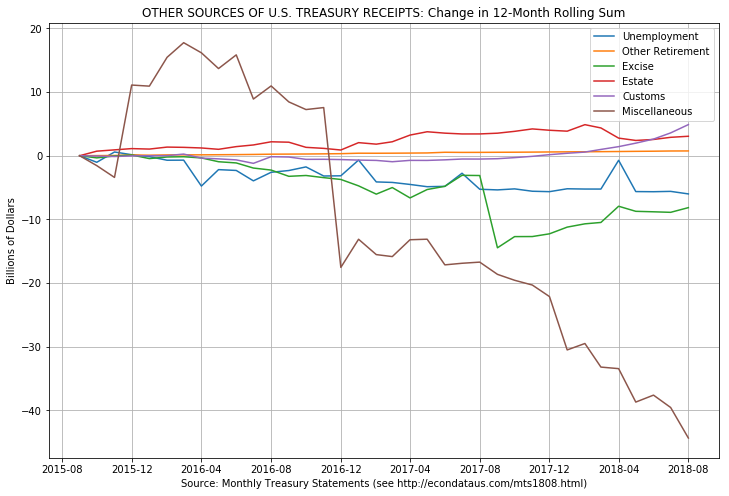

In [59]:
yy = yy0.copy()
zz = dofilter(yy, rollingsum=True, normalize=True)
dd = zz.iloc[:,3:9]
#print(dd)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(dd)
ax.set_title('OTHER SOURCES OF U.S. TREASURY RECEIPTS: Change in 12-Month Rolling Sum')
ax.set_xlabel('Source: Monthly Treasury Statements (see http://econdataus.com/mts1808.html)') # UPDATE
ax.set_ylabel('Billions of Dollars')
ax.grid(zorder=0)
ax.legend(dd.columns)
fig.savefig("mts1808recoth12m.png") # UPDATE filename


As can be seen, yearly receipts from excise taxes have fallen about \$5 billion and yearly miscellaneous receipts have fallen about \$20 billion since Trump took office.  Adding that to the \$125 billion gain in individual tax receipts, \$50 billion gain in employment tax receipts, and \$40 billion loss in corporation tax receipts gives a total gain of about \$110 billion for all receipts, same as was shown in the second plot above.

The [CBO Monthly Budget Review for April 2018](https://www.cbo.gov/publication/53821), referenced by the Washington Times article as mentioned above, starts as follows:

> The federal budget deficit was \$382 billion for the first seven months of fiscal year 2018, the Congressional Budget Office estimates, \$37 billion more than the shortfall recorded during the same period last year. Revenues and outlays were higher, by 4 percent and 5 percent, respectively, than they were during the first seven months of fiscal year 2017.

Hence, despite the increase in receipts, the deficit is continuing to grow.  The following Python code plots the increase the 12-month rolling sum of the deficit.


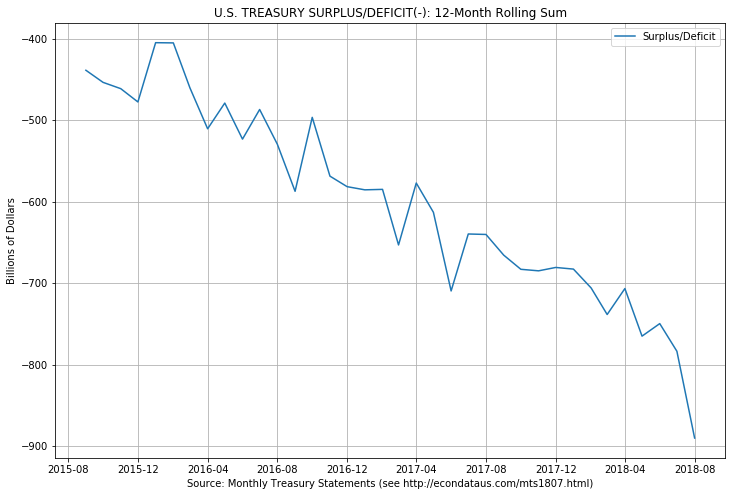

In [60]:
yy = yy0.copy()
zz = dofilter(yy, rollingsum=True)
dd = zz.iloc[:,[11]]
#print(dd)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(dd)
ax.set_title('U.S. TREASURY SURPLUS/DEFICIT(-): 12-Month Rolling Sum')
ax.set_xlabel('Source: Monthly Treasury Statements (see http://econdataus.com/mts1807.html)')
ax.set_ylabel('Billions of Dollars')
ax.grid(zorder=0)
ax.legend(dd.columns)
fig.savefig("mts1808def12m.png") # UPDATE filename


As can be seen, the annual deficit has increased from just under \$600 billion per year when Trump took office to over \$700 billion per year now.  Hence, the record suplus in April does not appear to signify anything more than the fact that 2017 had relatively strong economic growth.  Contrary to Marc Short's statement, it doesn't appear to have much, if anything, to do with a tax bill that was passed just a few months ago.  The April surplus also does not seem to indicate that the projected increase in the deficit has changed significantly.

Note: The Jupyter Notebook from which this post is generated can be found at http://econdataus.com/mts1808.ipynb. It is identical to the one at http://econdataus.com/mts1804.ipynb except that it has been updated to include July 2018.  Links to additional Jupyter Notebooks can be found at http://econdataus.com/jupyter.html.